In [2]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
filepath = r'C:\Users\parim\Downloads\Advertising (1).csv' 
df = pd.read_csv(filepath)

In [4]:
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df = df.drop('ID',axis=1)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
X = df.drop('Sales',axis=1)

In [8]:
y=df['Sales']

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
polynomial_converter= PolynomialFeatures(degree=2,include_bias=False)   

In [11]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [12]:
poly_features = polynomial_converter.transform(X)

In [13]:
poly_features.shape

(200, 9)

In [14]:
X.shape

(200, 3)

In [15]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [16]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [17]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
test_predictions=model.predict(X_test)

In [24]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
MAE=mean_absolute_error(y_test,test_predictions)

In [27]:
MSE = mean_squared_error(y_test,test_predictions)

In [28]:
RMSE=np.sqrt(MSE)

In [29]:
RMSE

0.6646431757269

In [30]:
MAE

0.48967980448035886

In [31]:
MSE

0.44175055104033895

In [32]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [33]:
# use a loop to check overfitting and underfitting

#create the different order poly
# split poly feat train/test 
#store/save the rmse for both train and test
#plot the results(error vs poly order)



In [35]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    
    poly_features=poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_predictions=model.predict(X_train)
    test_predictions=model.predict(X_test)
    
    train_rmse=np.sqrt(mean_squared_error(y_train,train_predictions))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_predictions))
    
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [36]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020657,
 0.35170836883993556,
 0.2509342923789987,
 0.1956156925025929,
 5.421547696100478,
 0.14137016600250538,
 0.17122498951815454]

In [37]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269,
 0.5803286825219469,
 0.5077742640851456,
 2.575819388953378,
 4.335186390070786,
 1379.5295835582049,
 4077.6876482927823,
 95268.7801080893]

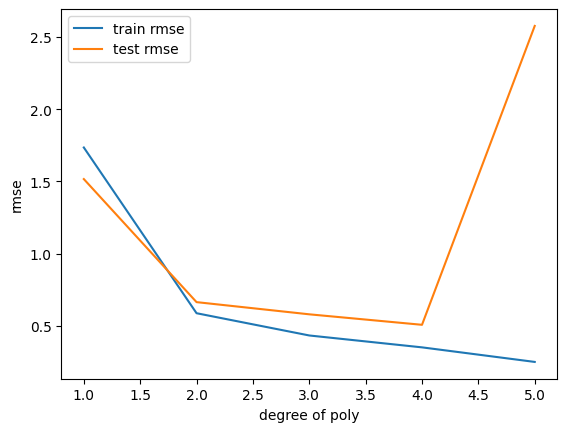

In [40]:
plt.plot(range(1,6),train_rmse_errors[:5],label='train rmse')
plt.plot(range(1,6),test_rmse_errors[:5],label='test rmse')
plt.ylabel('rmse')
plt.xlabel('degree of poly')
plt.legend()

In [42]:
# plt.plot(range(1,10),train_rmse_errors,label='train rmse')
# plt.plot(range(1,10),test_rmse_errors,label='test rmse')
# plt.ylabel('rmse')
# plt.xlabel('degree of poly')
# plt.legend()

In [44]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [45]:
final_model=LinearRegression()

In [46]:
full_converted_X=final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [47]:
from joblib import dump,load

In [48]:
dump(final_model,'final_poly_model.joblib')


['final_poly_model.joblib']

In [49]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [50]:
loaded_converter=load('final_converter.joblib')

In [51]:
loaded_model=load('final_poly_model.joblib')

In [52]:
campaign=[[149,22,12]]

In [57]:
transformed_data=loaded_converter.fit_transform(campaign)

In [56]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [58]:
loaded_model.predict(transformed_data)

array([14.64501014])